# Linear Algebra

## Vectors

A vector is anything that can be represented as having both magnitude and direction.

It is typically represented as an arrow on a graph

In [33]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [52]:
def plotVec(vecs):
    soa = np.array(vecs)
    X, Y, U, V = zip(*soa)
    plt.figure()
    ax = plt.gca()
    ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
    ax.set_xlim([-5, 10])
    ax.set_ylim([-5, 10])
    plt.draw()
    plt.grid()
    plt.show()

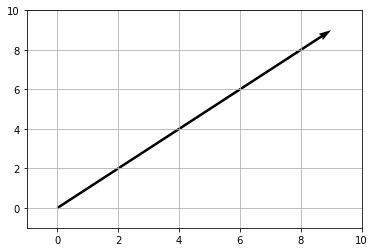

In [40]:
plotVec([ [0, 0, 9, 9]])

This two dimenional graph can be used to display dimensional vetcor representation

Vectors can have an infinite number of dimensions. 

In python, they can be represented by lists or Numpy arrays.

Transforming a vector is different from transforming a scalar. 

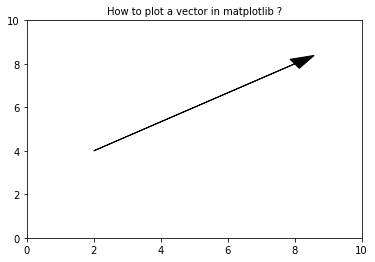

In [21]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.axes()

ax.arrow(2.0, 4.0, 6.0, 4.0, head_width=0.5, head_length=0.7, fc='black', ec='black')

#plt.grid()

plt.xlim(0,10)
plt.ylim(0,10)

plt.title('How to plot a vector in matplotlib ?',fontsize=10)

plt.savefig('how_to_plot_a_vector_in_matplotlib_fig1.png', bbox_inches='tight')
plt.show()
#plt.close()

In [43]:
a, b = [1,2,3,4], [5,6,7,8]

v1, v2 = [0,0,1,6], [0,0,5,2]

### Adding Vectors

$$\vec{a} + \vec{b} = \vec{c} $$

$$ (a_1, a_2, ... a_n) + (b_1, b_2, ... b_n) = (a_1 + b_2, a_2 + b_2, ... a_n + b_n)  $$

In [31]:
def vector_add(v, w):
    """adds corresponding elements"""
    return [v_i + w_i
            for v_i, w_i in zip(v, w)]

In [32]:
vector_add(a,b)

[6, 8, 10, 12]

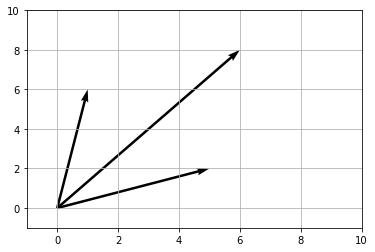

In [45]:
plotVec([v1,v2,vector_add(v1,v2)])

Sums for multiple vectors

In [58]:
c = [100,101,102,103]

In [59]:
def vector_sum(vectors):
    """componentwise sum"""
    result = vectors[0]                         # start with the first vector
    for vector in vectors[1:]:                  # then loop over the others
        result = vector_add(result, vector)     # and add them to the result
    return result

vector_sum([a,b,c])

[106, 109, 112, 115]

In [60]:
from functools import reduce, partial # only in Python 3; built in python 2
def vector_sum(vectors):
    return reduce(vector_add, vectors)
vector_sum([a,b, c])

[106, 109, 112, 115]

In [61]:
vector_sum = partial(reduce, vector_add)
vector_sum([a,b,c])

[106, 109, 112, 115]

## Subtracting Vectors

$$\vec{a} - \vec{b} = \vec{c} $$

$$ (a_1, a_2, ... a_n) - (b_1, b_2, ... b_n) = (a_1 - b_2, a_2 - b_2, ... a_n - b_n)  $$

In [46]:
def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i
            for v_i, w_i in zip(v, w)]

In [48]:
vector_subtract(b,a)

[4, 4, 4, 4]

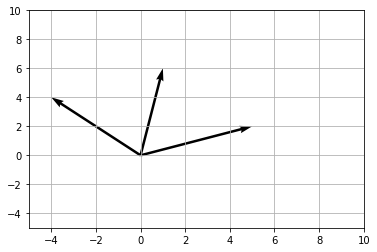

In [53]:
plotVec([v1,v2,vector_subtract(v1,v2)])

## Scalar Multiplication

$$c \cdot \vec{a} = c\vec{a} $$

$$ c \cdot (a_1, a_2, ... a_n) = (c \cdot a_1, c \cdot  a_2, ... c \cdot a_n)  $$

In [62]:
def vector_scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

In [64]:
vector_scalar_multiply(3, a)

[3, 6, 9, 12]

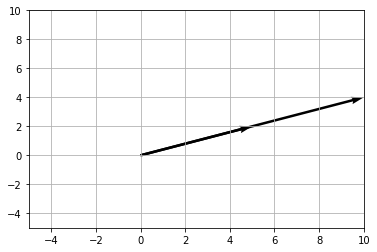

In [67]:
plotVec([v2,vector_scalar_multiply(2,v2)])

## Vector Mean

The mean of a set of vectors results in a vector whose ith element is the mean of the
    ith elements of the input vectors (ADD MATHJAX)

In [71]:
def vector_mean(vectors):
    """return the vector whose ith element is the mean of the
    ith elements of the input vectors"""
    n = len(vectors)
    return vector_scalar_multiply(1/n, vector_sum(vectors))

In [72]:
vector_mean([a,b])

[3.0, 4.0, 5.0, 6.0]

## Dot Product

The dot product measures how far the vector v extends in the w direction. It returns a scalar rather than another vector

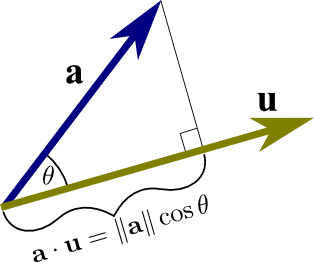

$$ \vec{a} \cdot \vec{b} = |a||b| \cos(\theta) $$

Can also be calculated by:

$$ \vec{a} \cdot \vec{b} = ([a_1 \cdot b_1] + [a_2 \cdot b_2] + ... + [a_n \cdot b_n]) $$

In [73]:
"""If w has magnitude 1, the dot product measures how far the vector v extends in the w
direction. For example, if w = [1, 0] then dot(v, w) is just the first component of v.
Another way of saying this is that it’s the length of the vector you’d get if you projected
v onto w"""
def dot(v, w):
    """(v_1 * w_1) + (v_2 * w_2)  ... + (v_n * w_n)"""
    return sum(v_i * w_i
               for v_i, w_i in zip(v, w))

dot(a,b)

70

In [12]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

sum_of_squares(a)

30

In [13]:
import math
def magnitude(v):
    return math.sqrt(sum_of_squares(v))   # math.sqrt is square root function

magnitude(a)

5.477225575051661

$$\sqrt{(v_1-w_1)^2 + (v_2-w_2)^2 + ... + (v_{n-1}-w_{n-1})^2 + (v_n-w_n)^2}$$

In [15]:
def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))
squared_distance(a,b)

480

In [16]:
def distance(v, w):
   return math.sqrt(squared_distance(v, w))
distance(a,b)

21.908902300206645

In [17]:
def distance2(v, w):
    return magnitude(vector_subtract(v, w))

distance2(a,b)

21.908902300206645

In [18]:
"""Using lists as vectors is great for exposition but terrible for perfor‐
mance.
In production code, you would want to use the NumPy library,
which includes a high-performance array class with all sorts of
arithmetic operations included."""

'Using lists as vectors is great for exposition but terrible for perfor‐\nmance.\nIn production code, you would want to use the NumPy library,\nwhich includes a high-performance array class with all sorts of\narithmetic operations included.'

## Matrices

A matrix is a two-dimensional collection of numbers. We will represent matrices as
lists of lists, with each inner list having the same size and representing a row of the
matrix. If A is a matrix, then A[i][j] is the element in the ith row and the jth column.
Per mathematical convention, we will typically use capital letters to represent matri‐
ces.
Two dimensional list \r
In mathematics, you would usually name the first row of the matrix
“row 1” and the first column “column 1.” Because we’re represent‐
ing matrices with Python lists, which are zero-indexed, we’ll call
the first row of a matrix “row 0” and the first column “column 0.”

In [19]:
A = [[1, 2, 3],  # A has 2 rows and 3 columns
     [4, 5, 6]]
B = [[1, 2],     # B has 3 rows and 2 columns
     [3, 4],
     [5, 6]]

In [20]:
"""Given this list-of-lists representation, the matrix A has len(A) rows and len(A[0])
columns, which we consider its shape:"""
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0   # number of elements in first row
    return num_rows, num_cols

shape(B)

(3, 2)

If a matrix has n rows and k columns, we will refer to it as a
n × k
 matrix. We can
(and sometimes will) think of each row of a
n × k
 matrix as a vector of length k, and
each column as a vector of length n:
def get_row(A, i):
    return A[i]             # A[i] is already the ith row
def get_column(A, j):
    return [A_i[j]          # jth element of row A_i
            for A_i in A]   # for each row A_i
We’ll also want to be able to create a matrix given its shape and a function for generat‐
ing its elements. We can do this using a nested list comprehension:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix
    whose (i,j)th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i
Given this function, you could make a 5 × 5 identity matrix (with 1s on the diagonal
and 0s elsewhere) with:
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0
identity_matrix = make_matrix(5, 5, is_diagonal)
# [[1, 0, 0, 0, 0],
#  [0, 1, 0, 0, 0],
#  [0, 0, 1, 0, 0],
#  [0, 0, 0, 1, 0],
#  [0, 0, 0, 0, 1]]
Matrices will be important to us for several reasons.
First, we can use a matrix to represent a data set consisting of multiple vectors, simply
by considering each vector as a row of the matrix. For example, if you had the
heights, weights, and ages of 1,000 people you could put them in a
1, 000 × 3
 matrix:
data = [[70, 170, 40],
        [65, 120, 26],
        [77, 250, 19],
        # ....
       ]
Second, as we’ll see later, we can use an
n × k
 matrix to represent a linear function
that maps k-dimensional vectors to n-dimensional vectors. Several of our techniques
and concepts will involve such functions.

Third, matrices can be used to represent binary relationships. In Chapter 1, we repre‐
sented the edges of a network as a collection of pairs (i, j). An alternative represen‐
tation would be to create a matrix A such that A[i][j] is 1 if nodes i and j are
connected and 0 otherwise.
Recall that before we had:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
               (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]
We could also represent this as:
     #     user 0  1  2  3  4  5  6  7  8  9
     #
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9
If there are very few connections, this is a much more inefficient representation, since
you end up having to store a lot of zeroes. However, with the matrix representation it
is much quicker to check whether two nodes are connected—you just have to do a
matrix lookup instead of (potentially) inspecting every edge:
friendships[0][2] == 1   # True, 0 and 2 are friends
friendships[0][8] == 1   # False, 0 and 8 are not friends
Similarly, to find the connections a node has, you only need to inspect the column (or
the row) corresponding to that node:
friends_of_five = [i                                              # only need
                   for i, is_friend in enumerate(friendships[5])  # to look at
                   if is_friend]                                  # one row
Previously we added a list of connections to each node object to speed up this pro‐
cess, but for a large, evolving graph that would probably be too expensive and diffi‐
cult to maintain.